In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='facebook/opt-350m'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-5, 5.0e-5 ,1.0e-4]

for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=16)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       accumulation_steps=2,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search facebook/opt-350m, learning rate 1e-05


Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.4011	Val Loss:	0.4548	Accuracy:	0.7877	F1:	0.6111
2 / 30: Train Loss:	0.2440	Val Loss:	0.4215	Accuracy:	0.8315	F1:	0.7659
3 / 30: Train Loss:	0.2019	Val Loss:	1.3618	Accuracy:	0.6039	F1:	0.5987
4 / 30: Train Loss:	0.2238	Val Loss:	0.9480	Accuracy:	0.6915	F1:	0.6718
5 / 30: Train Loss:	0.2905	Val Loss:	0.5305	Accuracy:	0.7549	F1:	0.5384
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.72      0.58      0.64       119
      struct       0.86      0.92      0.89       338

    accuracy                           0.83       457
   macro avg       0.79      0.75      0.77       457
weighted avg       0.82      0.83      0.83       457

test results:
              precision    recall  f1-score   support

       bknow       0.60      0.57      0.58        67
      struct       0.85      0.87      0.86       189

    accuracy                           0.79    

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.5817	Val Loss:	0.5485	Accuracy:	0.7484	F1:	0.6525
2 / 30: Train Loss:	0.2843	Val Loss:	0.6190	Accuracy:	0.7396	F1:	0.4252
3 / 30: Train Loss:	0.3132	Val Loss:	0.5777	Accuracy:	0.7396	F1:	0.4252
4 / 30: Train Loss:	0.2979	Val Loss:	0.5766	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.52      0.43      0.47       119
      struct       0.81      0.86      0.84       338

    accuracy                           0.75       457
   macro avg       0.67      0.64      0.65       457
weighted avg       0.74      0.75      0.74       457

test results:
              precision    recall  f1-score   support

       bknow       0.65      0.54      0.59        67
      struct       0.85      0.90      0.87       189

    accuracy                           0.80       256
   macro avg       0.75      0.72      0.73       256
weighted av

Some weights of OPTForSequenceClassification were not initialized from the model checkpoint at facebook/opt-350m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.6392	Val Loss:	0.5807	Accuracy:	0.7396	F1:	0.4252
2 / 30: Train Loss:	0.3051	Val Loss:	0.5897	Accuracy:	0.7396	F1:	0.4252
3 / 30: Train Loss:	0.3062	Val Loss:	0.5833	Accuracy:	0.7396	F1:	0.4252
4 / 30: Train Loss:	0.3009	Val Loss:	0.5776	Accuracy:	0.7396	F1:	0.4252
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00       119
      struct       0.74      1.00      0.85       338

    accuracy                           0.74       457
   macro avg       0.37      0.50      0.43       457
weighted avg       0.55      0.74      0.63       457

test results:
              precision    recall  f1-score   support

       bknow       0.00      0.00      0.00        67
      struct       0.74      1.00      0.85       189

    accuracy                           0.74       256
   macro avg       0.37      0.50      0.42       256
weighted av

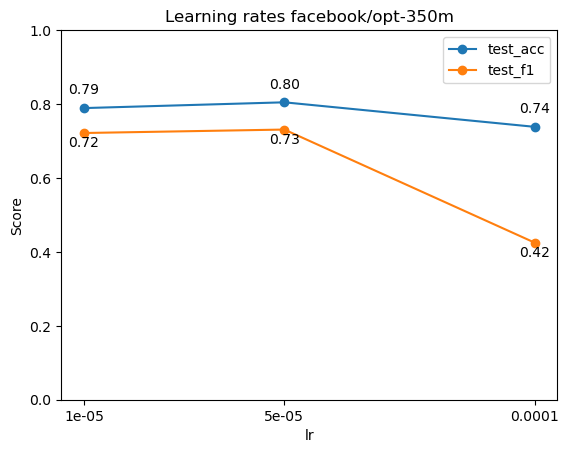

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Learning rates {model_checkpoint}',
                        column='lr',
                        sci_format=False)

In [6]:
%reset -f